In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()

In [0]:
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
import keras
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D , Conv2DTranspose
from keras.models import Sequential, Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [6]:
import numpy as np 
import pandas as pd 
import os
import time
#import tensorflow as tf
import numpy as np
import glob
from glob import glob
import datetime
import random
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:

SOURCE_IMAGES = os.path.join('/content/gdrive/My Drive/', 'COVID5')
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))
 

images[0:10]

['/content/gdrive/My Drive/COVID5/8637.png',
 '/content/gdrive/My Drive/COVID5/8645.png',
 '/content/gdrive/My Drive/COVID5/8643.png',
 '/content/gdrive/My Drive/COVID5/8646.png',
 '/content/gdrive/My Drive/COVID5/8647.png',
 '/content/gdrive/My Drive/COVID5/8642.png',
 '/content/gdrive/My Drive/COVID5/8644.png',
 '/content/gdrive/My Drive/COVID5/8648.png',
 '/content/gdrive/My Drive/COVID5/8649.png',
 '/content/gdrive/My Drive/COVID5/8651.png']

In [8]:
labels = pd.read_csv('/content/gdrive/My Drive/sondataset6.csv')
labels.head(-10)

IMG  REGION
0        1.png       2
1        2.png       2
2        3.png       2
3        4.png       2
4        5.png       2
...        ...     ...
3739  8254.png       3
3740  8255.png       3
3741  8256.png       3
3742  8257.png       3
3743  8258.png       3

[3744 rows x 2 columns]

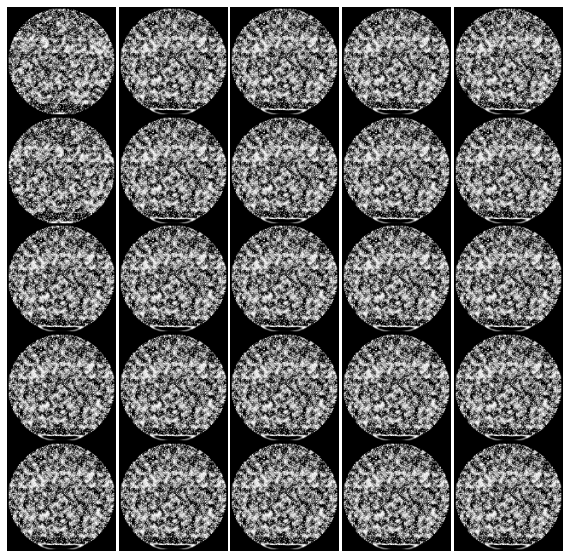

In [0]:
import cv2
multipleImages = glob('/content/gdrive/My Drive/COVID5/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

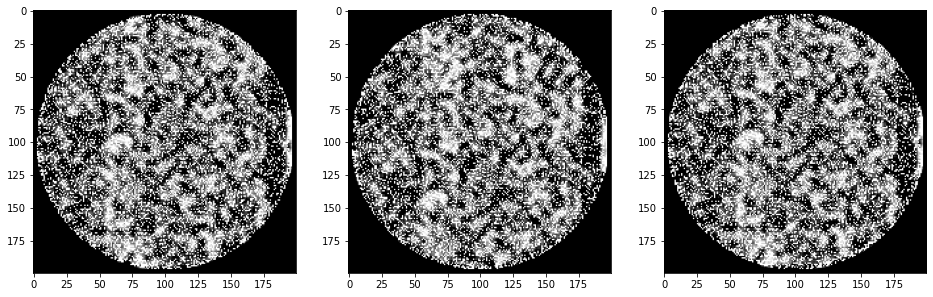

In [0]:
r = random.sample(images, 3)
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))
plt.subplot(132)
plt.imshow(cv2.imread(r[1]))
plt.subplot(133)
plt.imshow(cv2.imread(r[2])); 

In [0]:
print(labels.shape[0])

3754


In [9]:
from tqdm import tqdm
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

train_image = []
input_shape=(200,200,3)

for i in tqdm(range(labels.shape[0])):
    img = image.load_img('/content/gdrive/My Drive/COVID5/'+labels['IMG'][i],target_size=input_shape)
    img = image.img_to_array(img)
    #img = img/255     
    train_image.append(img)
X = np.array(train_image)
y=labels['REGION'].values
y = to_categorical(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2)

100%|██████████| 3754/3754 [31:18<00:00,  2.00it/s]


In [10]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_val.shape)
print("Training Data Shape:", len(X_train), X_train[0].shape)
print("Testing Data Shape:", len(X_val), X_val[0].shape)



print("1Training Data Shape:", y_train.shape)
print("1Testing Data Shape:", y_val.shape)
print("1Training Data Shape:", len(y_train), y_train[0].shape)
print("1Testing Data Shape:", len(y_val), y_val[0].shape)
print(y)


Training Data Shape: (3003, 200, 200, 3)
Testing Data Shape: (751, 200, 200, 3)
Training Data Shape: 3003 (200, 200, 3)
Testing Data Shape: 751 (200, 200, 3)
1Training Data Shape: (3003, 4)
1Testing Data Shape: (751, 4)
1Training Data Shape: 3003 (4,)
1Testing Data Shape: 751 (4,)
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [11]:
from sklearn.utils import class_weight
#class_weight = class_weight.compute_class_weight('balanced', np.unique(y), y)

y_integers = np.argmax(y, axis=1)
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

print(d_class_weights)

{0: 1.093822843822844, 1: 0.6694008559201141, 2: 0.7654975530179445, 3: 3.501865671641791}


In [0]:
# Helper Functions  Learning Curves and Confusion Matrix

from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import itertools

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(20,10))
    metrics = np.load('logs.npy',allow_pickle=True)[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(18,18))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('/content/gdrive/My Drive/Colab Notebooks/accuracy_curve.png', dpi=300)
    plt.savefig('/content/gdrive/My Drive/Colab Notebooks/bbb.eps', format='eps')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('/content/gdrive/My Drive/Colab Notebooks/loss_curve.png', dpi=300)
    plt.savefig('/content/gdrive/My Drive/Colab Notebooks/ccc.eps', format='eps')

In [13]:
dict_characters = {0: 'ASIA', 1: 'EUR', 
        2: 'AME', 3 :'AUSTR'}

 
print("")
print(dict_characters)


{0: 'ASIA', 1: 'EUR', 2: 'AME', 3: 'AUSTR'}


In [0]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Conv2D, Lambda, MaxPooling2D, BatchNormalization
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

weight_path = '/content/gdrive/My Drive/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'
im_size = 200
map_characters=dict_characters
def vgg19network(a,b,c,d,e,f,g):
    num_class = f
    epochs = g
    input_tensor = Input(shape=(200, 200, 3))
    base_model = VGG19(#weights='imagenet',
        weights = weight_path, include_top=False, input_shape=(im_size, im_size, 3))
    # Add a new top layer
    x = base_model.output
    #x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    #x = Dense(256)(x)
    predictions = Dense(num_class, activation='softmax')(x)
    # This is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    # First: train only the top layers (which were randomly initialized)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(loss='categorical_crossentropy', 
                  optimizer=keras.optimizers.RMSprop(lr=0.0001), 
                  metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    model.summary()
    model.fit(a,b, epochs=epochs, class_weight=e, validation_data=(c,d), verbose=1,callbacks = [MetricsCheckpoint('logs')])
    score = model.evaluate(c,d, verbose=0)
    print('\nKeras CNN #2 - accuracy:', score[1], '\n')
    y_pred = model.predict(c)
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='') 
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(d,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    plotKerasLearningCurve()
    plt.show()
    plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values()))
    plt.show()

     


    # create plot
    dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']
    fig, c_ax = plt.subplots(1,1, figsize = (19, 19))
    for (i, label) in enumerate(dummy_labels):
        fpr, tpr, thresholds = roc_curve(y_val[:,i].astype(int), y_pred[:,i])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label, auc(fpr, tpr)))
    # Set labels for plot
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')

    return model
#vgg16network(X_train, Y_trainHot, X_test, Y_testHot,class_weight,8,5)

In [0]:
 
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D

from keras.applications.densenet import DenseNet121
from keras.models import Model
import sklearn
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc

weight_path = '/content/gdrive/My Drive/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5'
im_size = 200
map_characters=dict_characters

def dense121network(a,b,c,d,e,f,g,h):
    num_class = f
    epochs = g
    input_tensor = Input(shape=(200, 200, 3))
    base_model = DenseNet121(weights='imagenet', include_top=False, input_tensor=input_tensor)
    # add a global spatial average pooling layer
    x = base_model.output
    #x = Flatten()(x)
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dropout(0.5)(x)
    x = Dense(512)(x)
    # and a logistic layer
    predictions = Dense(4, activation='softmax')(x)
    # This is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    # First: train only the top layers (which were randomly initialized)
    #for layer in base_model.layers:
    #    layer.trainable = False
    model.compile(loss='categorical_crossentropy', 
                  optimizer=keras.optimizers.RMSprop(lr=0.0001), 
                  metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    model.summary()
    model.fit(a,b, epochs=epochs, validation_data=(c,d), verbose=1,callbacks = [MetricsCheckpoint('logs')])
    score = model.evaluate(c,d, verbose=0)
    print('\nKeras CNN #2 - accuracy:', score[1], '\n')
    y_pred = model.predict(c)
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='') 
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(d,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    plotKerasLearningCurve()
    plt.show()
    plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values()))
    plt.show()
    plt.savefig('/content/gdrive/My Drive/Colab Notebooks/aaa.eps', format='eps')
    
    # create plot
    dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    for (i, label) in enumerate(dummy_labels):
        fpr, tpr, thresholds = roc_curve(y_val[:,i].astype(int), y_pred[:,i])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label, auc(fpr, tpr)))
    # Set labels for plot
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')
    
    #after finetuning
    '''for layer in base_model.layers[:110]:
        layer.trainable = True
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer=keras.optimizers.RMSprop(lr=0.0001), 
                  metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    model.summary()
    model.fit(a,b, epochs=h,  validation_data=(c,d), verbose=1,callbacks = [MetricsCheckpoint('logs')])
    score = model.evaluate(c,d, verbose=0)
    print('\nKeras CNN #2 - accuracy:', score[1], '\n')
    y_pred = model.predict(c)
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='') 
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(d,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    plotKerasLearningCurve()
    plt.show()
    plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values()))
    plt.show()'''

    return model

 
 

In [0]:
print(np.unique(y))
print(y)

[0. 1.]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [15]:
from sklearn.utils import class_weight

y_integers = np.argmax(y, axis=1)
class_weight = class_weight.compute_class_weight('balanced', np.unique(y_integers), y_integers)
#d_class_weights = dict(enumerate(class_weights))
#class_weight = class_weight.compute_class_weight('balanced', np.unique(y), y)
print("Old Class Weights: ",class_weight)
#from sklearn.utils import class_weight
#y_integers2 = np.argmax(Y_trainRos, axis=1)
#class_weight = class_weight.compute_class_weight('balanced', np.unique(y_integers2), y_integers2)
print("New Class Weights: ",class_weight)

Old Class Weights:  [1.09382284 0.66940086 0.76549755 3.50186567]
New Class Weights:  [1.09382284 0.66940086 0.76549755 3.50186567]


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

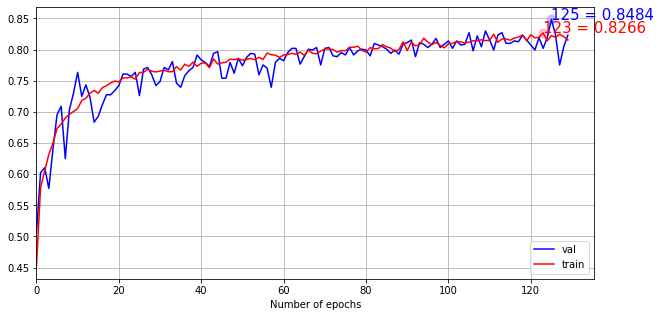

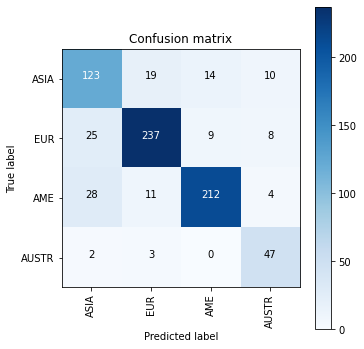

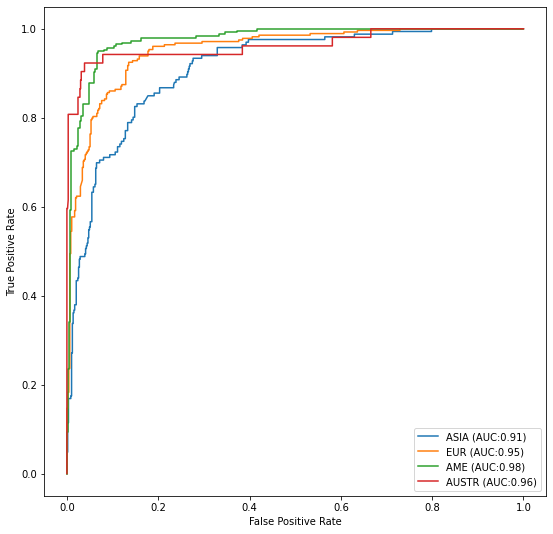

In [0]:
mymodel= vgg16network(X_train, y_train, X_val, y_val,class_weight,4,130)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
29089792/29084464 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 100, 100, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 100, 1

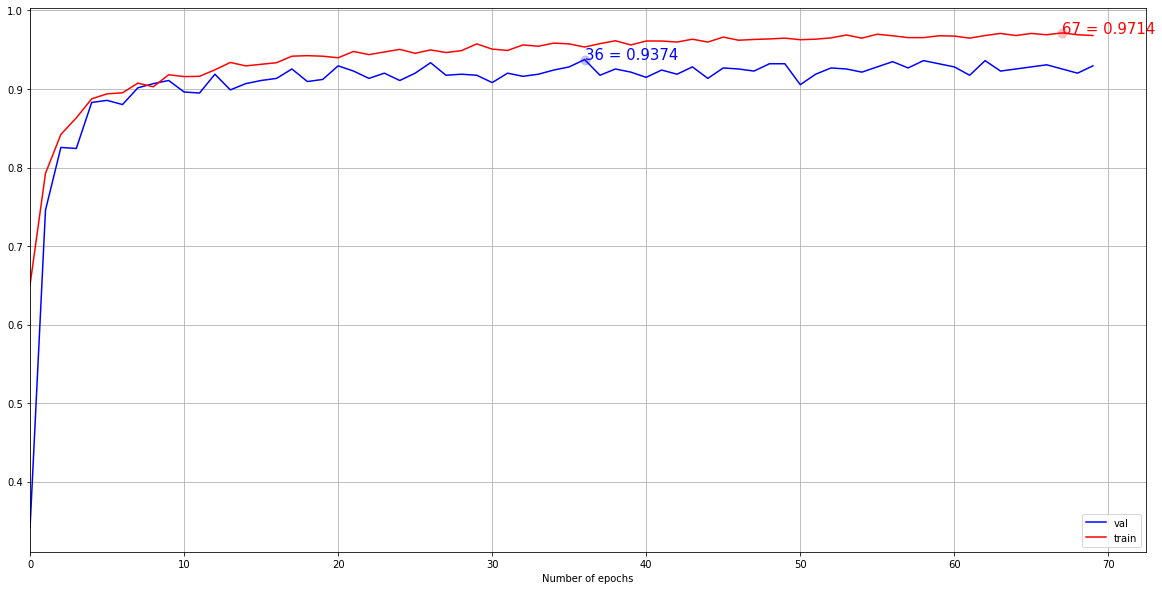

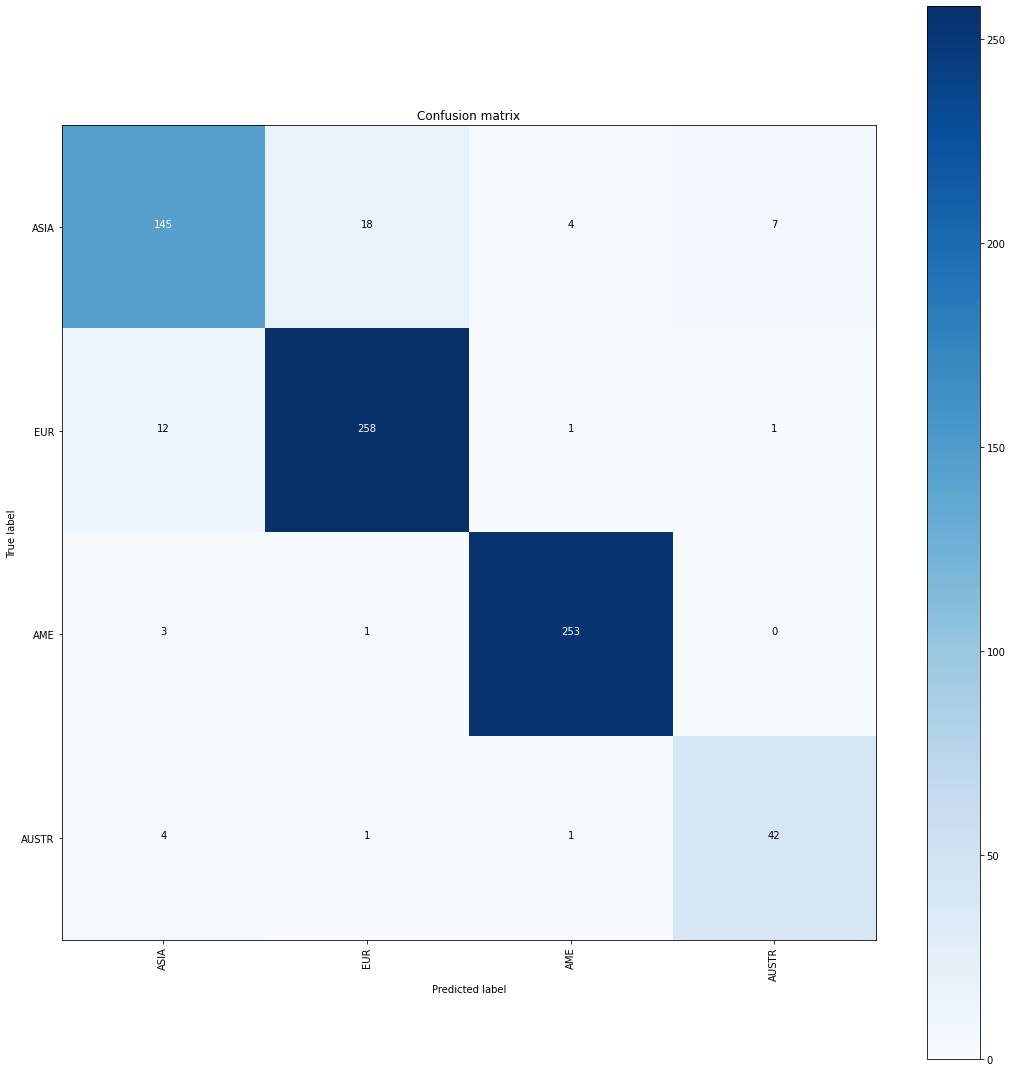

<Figure size 432x288 with 0 Axes>

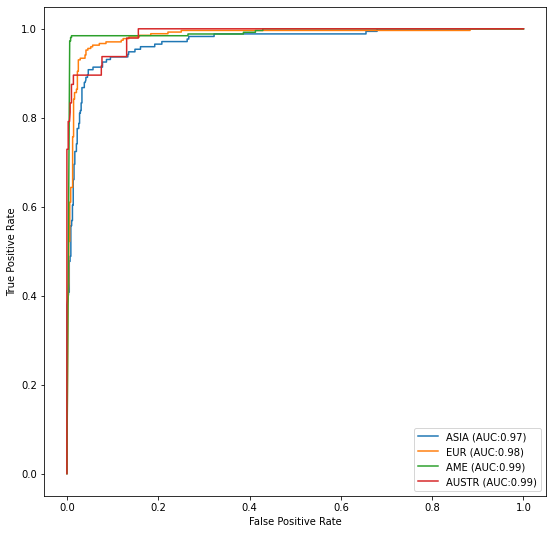

In [16]:
mymodel= dense121network(X_train, y_train, X_val, y_val,class_weight,4,70,100)

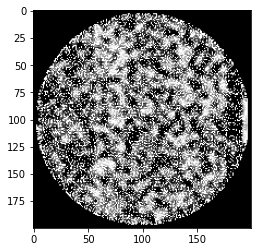

In [18]:
import cv2
testimage = cv2.imread('/content/gdrive/My Drive/901.png')
imgplot = plt.imshow(testimage)
plt.show()

In [19]:
X_data = []
X_data.append (testimage)

print('X_data shape:', np.array(X_data).shape)

preds = mymodel.predict(np.array(X_data))[0]

print(preds)

dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']

label = dummy_labels[preds.argmax()]

X_data shape: (1, 200, 200, 3)
[1.0000000e+00 2.1901481e-24 2.3624947e-23 5.2030018e-28]


In [20]:
for (i, (emotion, prob)) in enumerate(zip(dummy_labels, preds)):
    # construct the label text
    text = "{}: {:.3f}%".format(emotion, prob * 100)
    print(text)

ASIA: 100.000%
EUR: 0.000%
AME: 0.000%
AUSTR: 0.000%


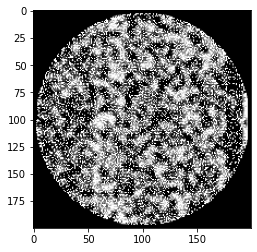

ASIA: 0.000%
EUR: 0.000%
AME: 100.000%
AUSTR: 0.000%


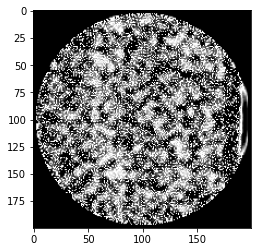

ASIA: 98.826%
EUR: 0.051%
AME: 0.001%
AUSTR: 1.121%


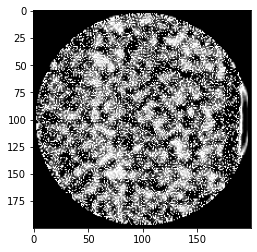

ASIA: 98.988%
EUR: 0.049%
AME: 0.001%
AUSTR: 0.962%


In [21]:
testimage1 = cv2.imread('/content/gdrive/My Drive/939.png')
imgplot = plt.imshow(testimage1)
plt.show()
X_data1 = []
X_data1.append (testimage1)
preds = mymodel.predict(np.array(X_data1))[0]
dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']
label = dummy_labels[preds.argmax()]

for (i, (emotion, prob)) in enumerate(zip(dummy_labels, preds)):
    # construct the label text
    text = "{}: {:.3f}%".format(emotion, prob * 100)
    print(text)

testimage2 = cv2.imread('/content/gdrive/My Drive/4870.png')
imgplot = plt.imshow(testimage2)
plt.show()
X_data2 = []
X_data2.append (testimage2)
preds = mymodel.predict(np.array(X_data2))[0]
dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']
label = dummy_labels[preds.argmax()]

for (i, (emotion, prob)) in enumerate(zip(dummy_labels, preds)):
    # construct the label text
    text = "{}: {:.3f}%".format(emotion, prob * 100)
    print(text)

testimage1 = cv2.imread('/content/gdrive/My Drive/4871.png')
imgplot = plt.imshow(testimage1)
plt.show()
X_data3 = []
X_data3.append (testimage1)
preds = mymodel.predict(np.array(X_data3))[0]
dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']
label = dummy_labels[preds.argmax()]

for (i, (emotion, prob)) in enumerate(zip(dummy_labels, preds)):
    # construct the label text
    text = "{}: {:.3f}%".format(emotion, prob * 100)
    print(text)

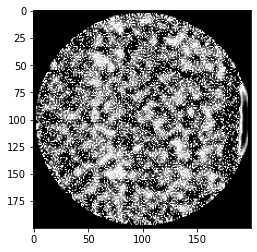

ASIA: 98.478%
EUR: 0.051%
AME: 0.001%
AUSTR: 1.469%


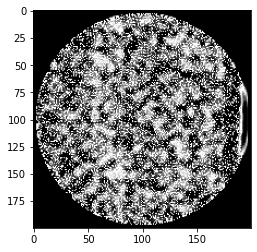

ASIA: 98.837%
EUR: 0.050%
AME: 0.001%
AUSTR: 1.111%


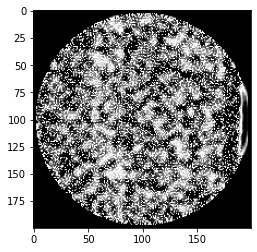

ASIA: 98.082%
EUR: 0.051%
AME: 0.001%
AUSTR: 1.867%


In [22]:
testimage1 = cv2.imread('/content/gdrive/My Drive/4874.png')
imgplot = plt.imshow(testimage1)
plt.show()
X_data1 = []
X_data1.append (testimage1)
preds = mymodel.predict(np.array(X_data1))[0]
dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']
label = dummy_labels[preds.argmax()]

for (i, (emotion, prob)) in enumerate(zip(dummy_labels, preds)):
    # construct the label text
    text = "{}: {:.3f}%".format(emotion, prob * 100)
    print(text)

testimage2 = cv2.imread('/content/gdrive/My Drive/4875.png')
imgplot = plt.imshow(testimage2)
plt.show()
X_data2 = []
X_data2.append (testimage2)
preds = mymodel.predict(np.array(X_data2))[0]
dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']
label = dummy_labels[preds.argmax()]

for (i, (emotion, prob)) in enumerate(zip(dummy_labels, preds)):
    # construct the label text
    text = "{}: {:.3f}%".format(emotion, prob * 100)
    print(text)

testimage1 = cv2.imread('/content/gdrive/My Drive/4876.png')
imgplot = plt.imshow(testimage1)
plt.show()
X_data3 = []
X_data3.append (testimage1)
preds = mymodel.predict(np.array(X_data3))[0]
dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']
label = dummy_labels[preds.argmax()]

for (i, (emotion, prob)) in enumerate(zip(dummy_labels, preds)):
    # construct the label text
    text = "{}: {:.3f}%".format(emotion, prob * 100)
    print(text)

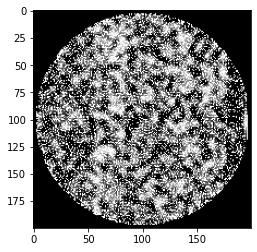

ASIA: 7.254%
EUR: 92.219%
AME: 0.017%
AUSTR: 0.509%


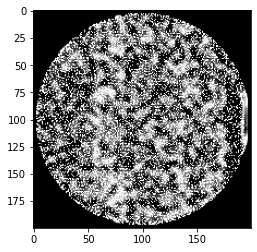

ASIA: 0.000%
EUR: 100.000%
AME: 0.000%
AUSTR: 0.000%


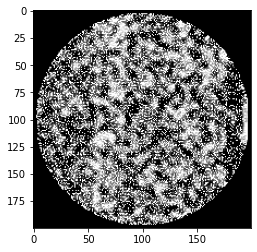

ASIA: 100.000%
EUR: 0.000%
AME: 0.000%
AUSTR: 0.000%


In [23]:
#yayinlar

testimage31 = cv2.imread('/content/gdrive/My Drive/4385.png')
imgplot = plt.imshow(testimage31)
plt.show()
X_data1 = []
X_data1.append (testimage31)
preds = mymodel.predict(np.array(X_data1))[0]
dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']
label = dummy_labels[preds.argmax()]

for (i, (emotion, prob)) in enumerate(zip(dummy_labels, preds)):
    # construct the label text
    text = "{}: {:.3f}%".format(emotion, prob * 100)
    print(text)

testimage32 = cv2.imread('/content/gdrive/My Drive/4921.png')
imgplot = plt.imshow(testimage32)
plt.show()
X_data2 = []
X_data2.append (testimage32)
preds = mymodel.predict(np.array(X_data2))[0]
dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']
label = dummy_labels[preds.argmax()]

for (i, (emotion, prob)) in enumerate(zip(dummy_labels, preds)):
    # construct the label text
    text = "{}: {:.3f}%".format(emotion, prob * 100)
    print(text)

testimage41 = cv2.imread('/content/gdrive/My Drive/6116.png')
imgplot = plt.imshow(testimage41)
plt.show()
X_data3 = []
X_data3.append (testimage41)
preds = mymodel.predict(np.array(X_data3))[0]
dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']
label = dummy_labels[preds.argmax()]

for (i, (emotion, prob)) in enumerate(zip(dummy_labels, preds)):
    # construct the label text
    text = "{}: {:.3f}%".format(emotion, prob * 100)
    print(text)

In [24]:
layer_names_list = [layr.name for layr in mymodel.layers]
print ("layer names list: ", layer_names_list)  

layer names list:  ['input_1', 'zero_padding2d_1', 'conv1/conv', 'conv1/bn', 'conv1/relu', 'zero_padding2d_2', 'pool1', 'conv2_block1_0_bn', 'conv2_block1_0_relu', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_concat', 'conv2_block2_0_bn', 'conv2_block2_0_relu', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_concat', 'conv2_block3_0_bn', 'conv2_block3_0_relu', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_concat', 'conv2_block4_0_bn', 'conv2_block4_0_relu', 'conv2_block4_1_conv', 'conv2_block4_1_bn', 'conv2_block4_1_relu', 'conv2_block4_2_conv', 'conv2_block4_concat', 'conv2_block5_0_bn', 'conv2_block5_0_relu', 'conv2_block5_1_conv', 'conv2_block5_1_bn', 'conv2_block5_1_relu', 'conv2_block5_2_conv', 'conv2_block5_concat', 'conv2_block6_0_bn', 'conv2_block6_0_relu', 'conv2_block6_1_conv', 'conv2_block6_1_bn', 'conv2_

In [25]:
selected_layers = ['conv2_block1_0_bn', 'conv2_block1_1_conv', 'conv2_block2_1_conv','conv2_block2_2_conv','conv2_block3_0_bn','conv3_block3_2_conv','conv3_block4_concat','conv4_block21_0_bn','conv5_block16_1_bn', 'conv5_block16_1_relu', 'conv5_block16_2_conv', 'conv5_block16_concat','global_average_pooling2d_1','dense_1','dense_2']
matched_indices = [i for i, item in enumerate(layer_names_list) if item in selected_layers]
print (matched_indices)

[7, 9, 16, 19, 21, 72, 80, 281, 421, 422, 423, 424, 427, 429, 430]


In [0]:
selected_layers_outputs = []
for lr in range(len(matched_indices)):
   outputs = mymodel.layers[matched_indices[lr]].output 
   #output from selected layers
   selected_layers_outputs.append(outputs)

In [0]:
visual_model = keras.models.Model(inputs = mymodel.input, outputs = selected_layers_outputs)

In [0]:
selected_feature_maps = visual_model.predict(np.array(X_data3))

conv2_block1_0_bn


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


conv2_block1_1_conv
conv2_block2_1_conv
conv2_block2_2_conv
conv2_block3_0_bn


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


conv3_block3_2_conv
conv3_block4_concat
conv4_block21_0_bn
conv5_block16_1_bn
conv5_block16_1_relu
conv5_block16_2_conv
conv5_block16_concat
global_average_pooling2d_1
dense_1
dense_2


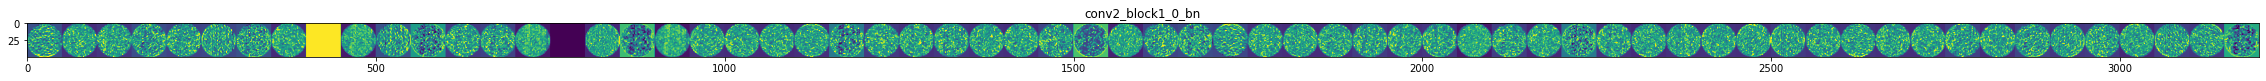

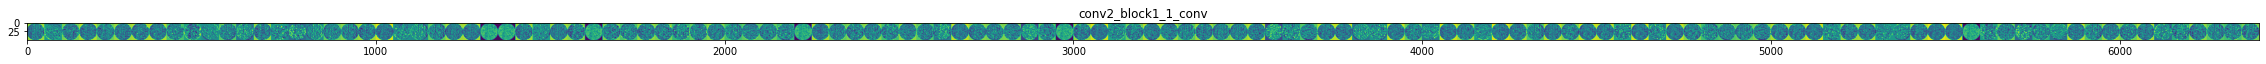

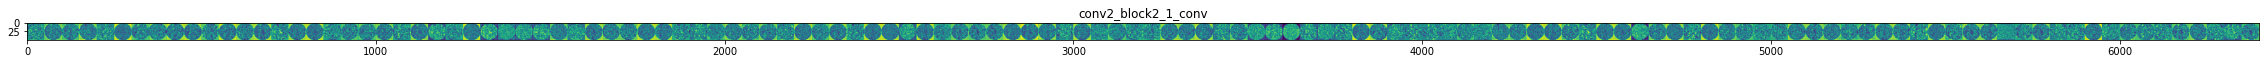

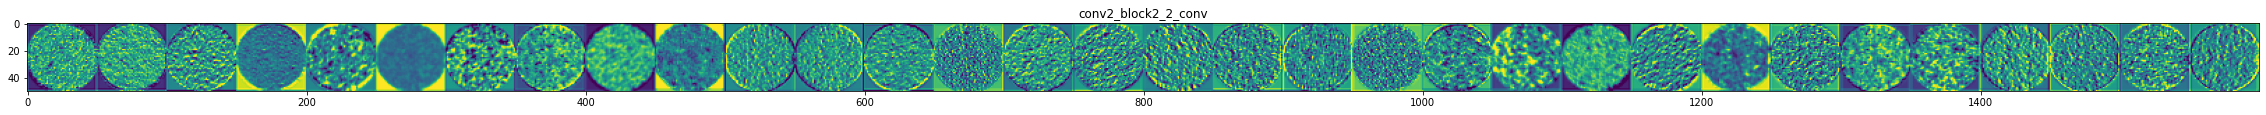

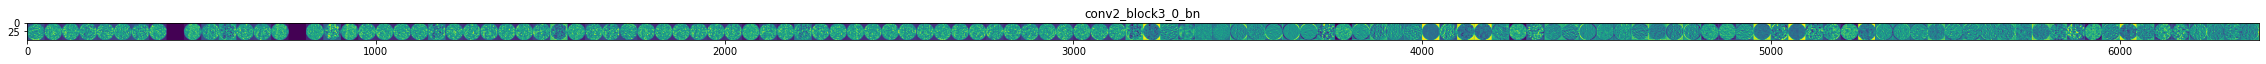

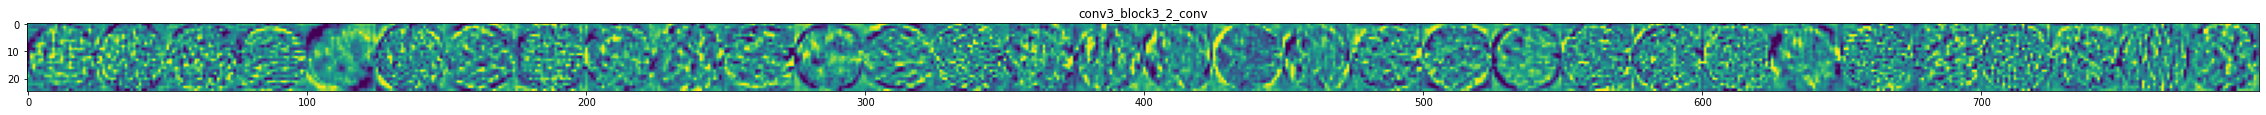

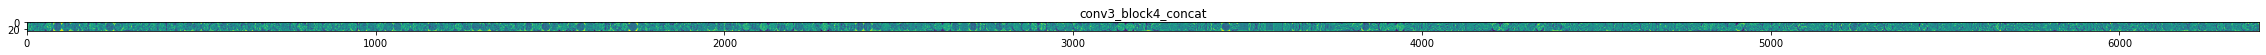

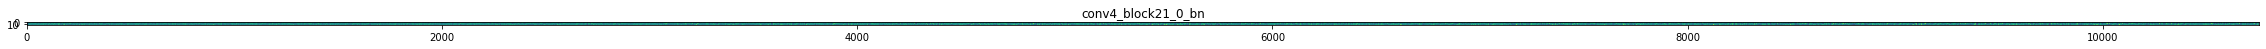

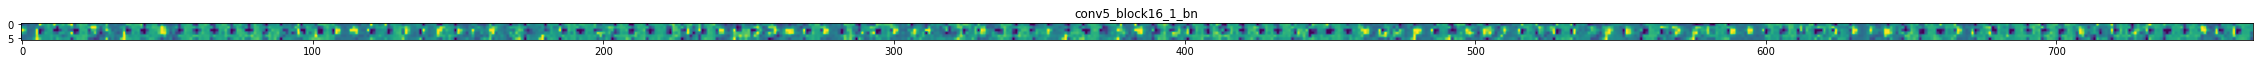

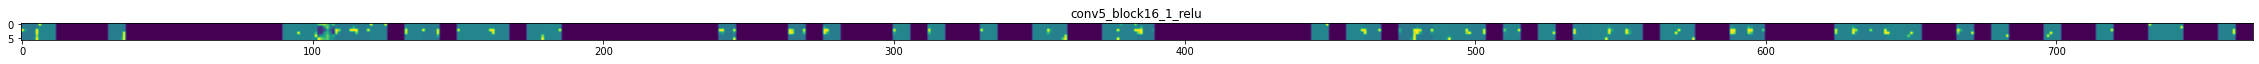

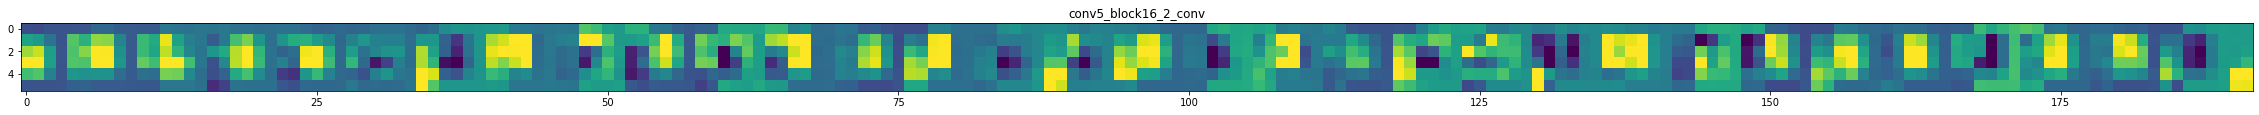

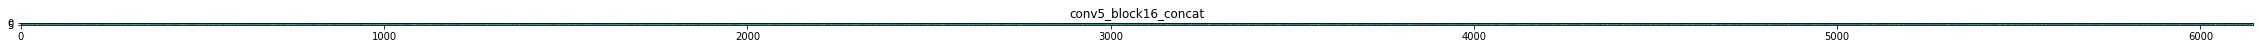

In [29]:
layer_names = [layer.name for layer in mymodel.layers]

for layer_name, feature_map in zip(selected_layers, selected_feature_maps):
    print(layer_name)
    if len(feature_map.shape) == 4:
       n_features = feature_map.shape[-1]  # number of features in the feature map
       size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
       display_grid = np.zeros((size, size * n_features))
       for i in range(n_features):
           x  = feature_map[0, :, :, i]
           x -= x.mean()
           x /= x.std ()
           x *=  64
           x += 128
           x  = np.clip(x, 0, 255).astype('uint8')
           display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
       scale = 40. / n_features
       #print((scale * n_features, scale))
       plt.figure( figsize=(scale * n_features, scale) )
       #plt.figure()
       #plt.figure( figsize=(6 * scale * n_features, 10 * scale) )

       plt.title(layer_name )
       plt.grid  ( False )
       plt.imshow(display_grid, aspect='auto', cmap='viridis' )
       plt.savefig('/content/gdrive/My Drive/Colab Notebooks/reso_%s.png'%(layer_name), dpi=1200)
       #plt.savefig('/content/gdrive/My Drive/Colab Notebooks/destination_path.eps', format='eps')

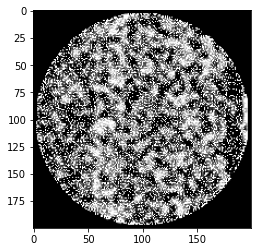

ASIA: 0.300%
EUR: 99.691%
AME: 0.001%
AUSTR: 0.008%


In [30]:
testimage11 = cv2.imread('/content/gdrive/My Drive/4392.png')
imgplot = plt.imshow(testimage11)
plt.show()
X_data11 = []
X_data11.append (testimage11)
preds = mymodel.predict(np.array(X_data11))[0]
dummy_labels = ['ASIA', 'EUR', 'AME','AUSTR']
label = dummy_labels[preds.argmax()]

for (i, (emotion, prob)) in enumerate(zip(dummy_labels, preds)):
    # construct the label text
    text = "{}: {:.3f}%".format(emotion, prob * 100)
    print(text)

In [0]:
only integer scalar arrays can be converted to a scalar index